## 1. Data exploration

Exploração dos dados baseado em:

- __1500__ observações
- __3__ características 
- __3__ usuários distintos

### Get started

In [1]:
from data import get_full_data, get_who_is
from matplotlib import pyplot as plt
from sklearn import linear_model
from predicting_who_is import accuracy_score, performance_metric
import pandas as pd
import numpy as np

from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

X, Y, df = get_full_data()

# Print the first few entries of the RMS Titanic data
display(X.head(100))

/home/ocean/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,rate_blink_left,rate_blink_right,rate_smile_or_not
0,1.00,0.99,0.08
1,0.99,1.00,0.06
2,0.99,0.99,0.10
3,0.99,0.99,0.13
4,0.99,0.99,0.20
5,0.99,0.99,0.14
6,0.99,0.99,0.09
7,1.00,1.00,0.11
8,0.99,0.99,0.12
9,0.99,1.00,0.14


### Create a function to analysing

In [2]:
# Exemplos de representação

# Boa referencia sobre analise de dados
#http://felipegalvao.com.br/blog/2016/03/08/visualizacao-de-dados-com-python-matplotlib/

# http://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-classifier-in-an-svm-supervised-learning-model/
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
# http://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py
#http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
def display_features(X, Y):
    from collections import Counter
    
    fig, eixos = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    
    # Dados do grafico de piscadas do olho esquerdo aberto
    y_axis = X['rate_blink_left']
    x_axis = range(len(y_axis))
    width_n = 0.5
    bar_color = 'orange'
    y_axis.fillna(y_axis.mean(), inplace=True)
    eixos[0].set_xlabel('Probabilidade (rate_blink_left)')
    eixos[0].set_ylabel('Ocorrencia')
    eixos[0].hist(y_axis, bins=15, color=bar_color)
    eixos[0].set_title('Probabilidade do olho esquerdo aberto')
    
    # Dados do grafico de piscadas do olho direito aberto
    y_axis = X['rate_blink_right']
    x_axis = range(len(y_axis))
    width_n = 0.5
    bar_color = 'red'
    y_axis.fillna(y_axis.mean(), inplace=True)
    eixos[1].set_xlabel('Probabilidade (rate_blink_right)')
    eixos[1].set_ylabel('Ocorrencia')
    eixos[1].hist(y_axis, bins=15, color=bar_color)
    eixos[1].set_title('Probabilidade do olho direito aberto')
    
    # Dados do grafico de estar sorrindo
    y_axis = X['rate_smile_or_not']
    x_axis = range(len(y_axis))
    width_n = 0.5
    bar_color = 'blue'
    y_axis.fillna(y_axis.mean(), inplace=True)
    eixos[2].set_xlabel('Probabilidade (rate_smile_or_not)')
    eixos[2].set_ylabel('Ocorrencia')
    eixos[2].hist(y_axis, bins=15, color=bar_color)
    eixos[2].set_title('Probabilidade de sorriso')
    
    # Ajusta o espaço entre os dois gráficos
    plt.subplots_adjust(wspace=.5)
    plt.show()

###  Feature Observation

We are see the 3 features in dataset

/home/ocean/.local/lib/python2.7/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


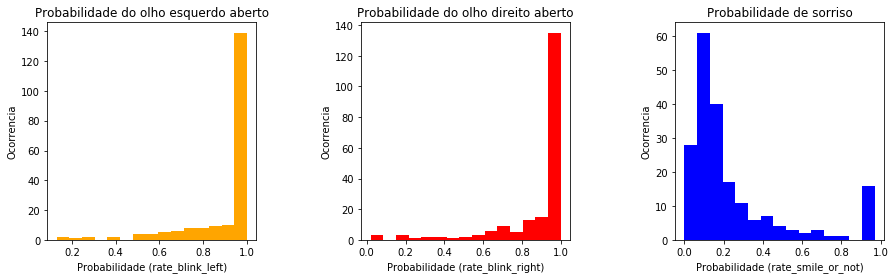

In [3]:
display_features(X, Y)

## 3. Developing a model

In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Shuffle and split data

For the code cell below, you will need to implement the following:

- Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.
    - Split the data into 80% training and 20% testing.
    - Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to X_train, X_test, y_train, and y_test.

In [4]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement

#### Algorithm OneVsRestClassifier

In [5]:
def model_1(resultados):
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.svm import LinearSVC
    modelo = OneVsRestClassifier(LinearSVC(random_state = 0))
    resultado = accuracy_score("OneVsRest", modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm OneVsOne

In [6]:
def model_2(resultados):
    from sklearn.multiclass import OneVsOneClassifier
    from sklearn.svm import LinearSVC
    modelo = OneVsOneClassifier(LinearSVC(random_state = 0))
    resultado = accuracy_score("OneVsOne", modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm MultinomialNB

In [7]:
def model_3(resultados):
    from sklearn.naive_bayes import MultinomialNB
    modelo = MultinomialNB()
    resultado = accuracy_score("MultinomialNB", modelo, X_train, y_train)

    resultados[resultado] = modelo 

#### Algorithm AdaBoostClassifier

In [8]:
def model_4(resultados):
    from sklearn.ensemble import AdaBoostClassifier
    modelo = AdaBoostClassifier()
    resultado = accuracy_score("AdaBoostClassifier", modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm LinearSVC

In [9]:
def model_5(resultados):
    from sklearn.svm import LinearSVC
    modelo = LinearSVC(random_state=0)
    resultado = accuracy_score('LinearSVC', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm SVC with Kernel Linear

In [10]:
def model_6(resultados):
    from sklearn.svm import SVC
    modelo = SVC(kernel='linear', C=0.025)
    resultado = accuracy_score('SVC with Kernel Linear', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm DecisionTreeClassifier

In [11]:
def model_7(resultados):
    from sklearn.tree import DecisionTreeClassifier
    modelo = DecisionTreeClassifier(random_state=0)
    resultado = accuracy_score('DecisionTreeClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorith Extra Trees

In [12]:
def model_8(resultados):
    from sklearn.ensemble import ExtraTreesRegressor
    modelo = ExtraTreesRegressor(n_estimators=10, random_state=0)
    resultado = accuracy_score('ExtraTrees', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm GaussianProcessClassifier

In [13]:
def model_9(resultados):
    from sklearn.gaussian_process import GaussianProcessClassifier
    from sklearn.gaussian_process.kernels import RBF
    modelo = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
    resultado = accuracy_score('GaussianProcessClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm MLPClassifier

In [14]:
def model_10(resultados):
    from sklearn.neural_network import MLPClassifier
    modelo = MLPClassifier(alpha=1)
    resultado = accuracy_score('MLPClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm KNeighborsClassifier

In [15]:
def model_11(resultados):
    from sklearn.neighbors import KNeighborsClassifier
    modelo = KNeighborsClassifier(6)
    resultado = accuracy_score('KNeighborsClassifier', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm QuadraticDiscriminantAnalysis

In [16]:
def model_12(resultados):
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    modelo = QuadraticDiscriminantAnalysis()
    resultado = accuracy_score('QuadraticDiscriminantAnalysis', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm GaussianNB

In [17]:
def model_13(resultados):
    from sklearn.naive_bayes import GaussianNB
    modelo = GaussianNB()
    resultado = accuracy_score('GaussianNB', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Algorithm RBF SVM

In [18]:
def model_14(resultados):
    from sklearn.svm import SVC
    modelo = SVC(gamma=2, C=1)
    resultado = accuracy_score('RBF SVM', modelo, X_train, y_train)

    resultados[resultado] = modelo

#### Select the best algorithm

In [19]:
# Storage result of all algorithm and select the best
resultados = {}

# Create model 1
model_1(resultados)
# Create model 2
model_2(resultados)
# Create model 3
model_3(resultados)
# Create model 4
model_4(resultados)
# Create model 5
model_5(resultados)
# Create model 6
model_6(resultados)
# Create model 7
model_7(resultados)
# Create model 8
model_8(resultados)
# Create model 9
# model_9(resultados)
# Create model 10
model_10(resultados)
# Create model 11
model_11(resultados)
# Create model 12
model_12(resultados)
# Create model 13
model_13(resultados)
# Create model 14
model_14(resultados)


performance_metric(resultados, X_train, X_test, y_train, y_test);

Taxa de acerto do OneVsRest: 79.82%
Taxa de acerto do OneVsOne: 79.82%
Taxa de acerto do MultinomialNB: 73.72%
Taxa de acerto do AdaBoostClassifier: 90.58%
Taxa de acerto do LinearSVC: 79.82%
Taxa de acerto do SVC with Kernel Linear: 51.25%
Taxa de acerto do DecisionTreeClassifier: 88.75%
Taxa de acerto do ExtraTrees: 68.76%


/home/ocean/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Taxa de acerto do MLPClassifier: 80.52%
Taxa de acerto do KNeighborsClassifier: 90.07%
Taxa de acerto do QuadraticDiscriminantAnalysis: 84.20%
Taxa de acerto do GaussianNB: 79.19%
Taxa de acerto do RBF SVM: 86.19%
Taxa de acerto base: 55.00%

Vencedor:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

Taxa de acerto do algoritmo vencedor entre os algoritmos no mundo real : 92.50% 
Total de elementos : 200


### Analysing best classifier

Plot data and see boundary of prediction

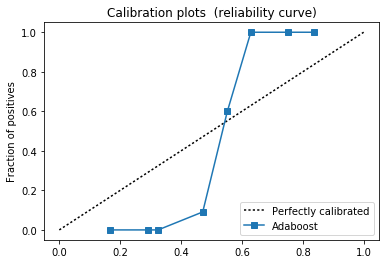

In [20]:
# TODO: Plotar em uma matriz de confusão os resultados
# http://developerdeveloper.blogspot.com.br/2013/11/matriz-confusao.html
# http://pt.stackoverflow.com/questions/66777/d%C3%BAvidas-na-utiliza%C3%A7%C3%A3o-de-stratified-k-fold-no-scikit-learn

ax1 = plt.subplot2grid((1, 1), (0, 0), rowspan=2)

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

# Classifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()

from sklearn.calibration import calibration_curve
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()

y = Y

clf.fit(X_train, y_train)
if hasattr(clf, "predict_proba"):
    prob_pos = clf.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos = clf.decision_function(X_test)
    prob_pos = \
        (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
fraction_of_positives, mean_predicted_value = \
    calibration_curve(y_test, prob_pos, n_bins=10)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
         label="%s" % ("Adaboost", ))

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

plt.show()

#### Confusion Matrix

Building confusion matrix from classifier 

Score mínimo: 0.85 Score máximo: 1.00 Score médio: 0.90


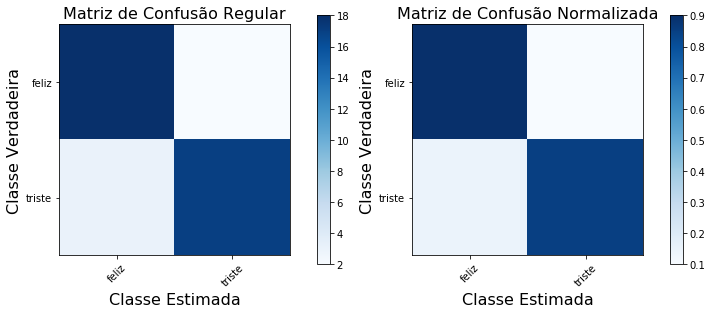

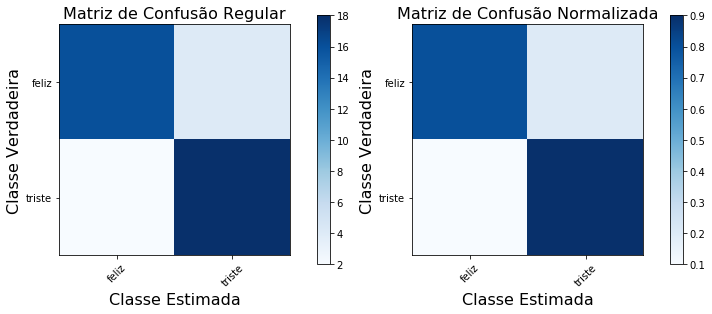

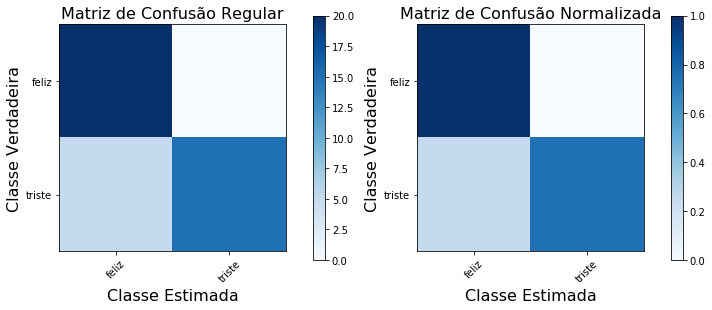

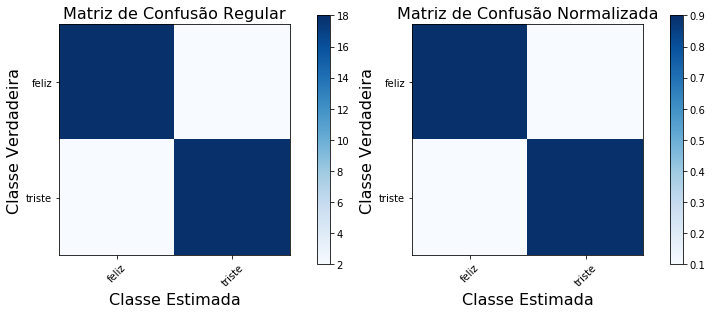

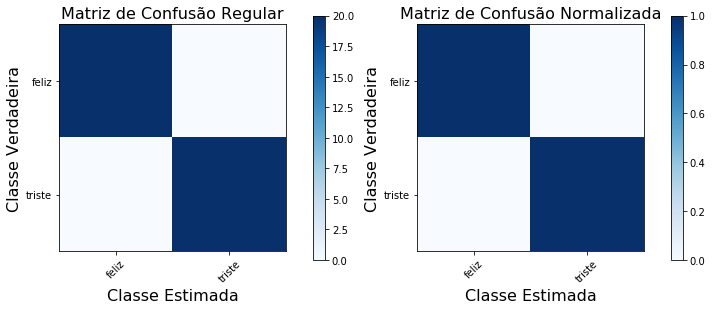

In [21]:
from confusion_matrix import plot

features = np.array(X)
target = np.array(Y)

from sklearn.ensemble import AdaBoostClassifier
modelo = AdaBoostClassifier()

plot(features, target, modelo, ['feliz', 'triste'])

### Predicting feelings

Feelings are:

- Sad (0)
- Surprise (1)
- Happy (2)

In [22]:
from collections import Counter

# 3 emoções (triste, surpreso e feliz) o melhor algoritmo de classficação foi o 
# OneVsOneClassifier com precisão no mundo real de 55% 
#from sklearn.multiclass import OneVsOneClassifier
#from sklearn.svm import LinearSVC
#modelo = OneVsOneClassifier(LinearSVC(random_state = 0))

# 2 emoções (triste e feliz) o melhor algoritmo de classificação foi o
# AdaBoostClassifier com precisão no mundo real de 92.50% 
from sklearn.ensemble import AdaBoostClassifier
modelo = AdaBoostClassifier()

X_who_is, Y_who_is, df = get_who_is()

modelo.fit(X, Y)

#display(X_who_is)

predict = modelo.predict(X_who_is)

result = Counter(predict)

who_is = result.most_common()[0][0]

print result

switcher = {
        0: "Vc parece estar triste! :(",
        1: "Vc parece estar surpreso! :o",
        2: "Vc parece estar feliz! :)"
}
msg = switcher.get(who_is, "Normal")
    
print msg

Counter({0: 29, 2: 22})
Vc parece estar triste! :(
